# 5.4 Exercises

1.Using basic statistical properties of the variance, as well as singlevariable calculus, derive (5.6). In other words, prove that α given by
(5.6) does indeed minimize Var(αX + (1 − α)Y ).


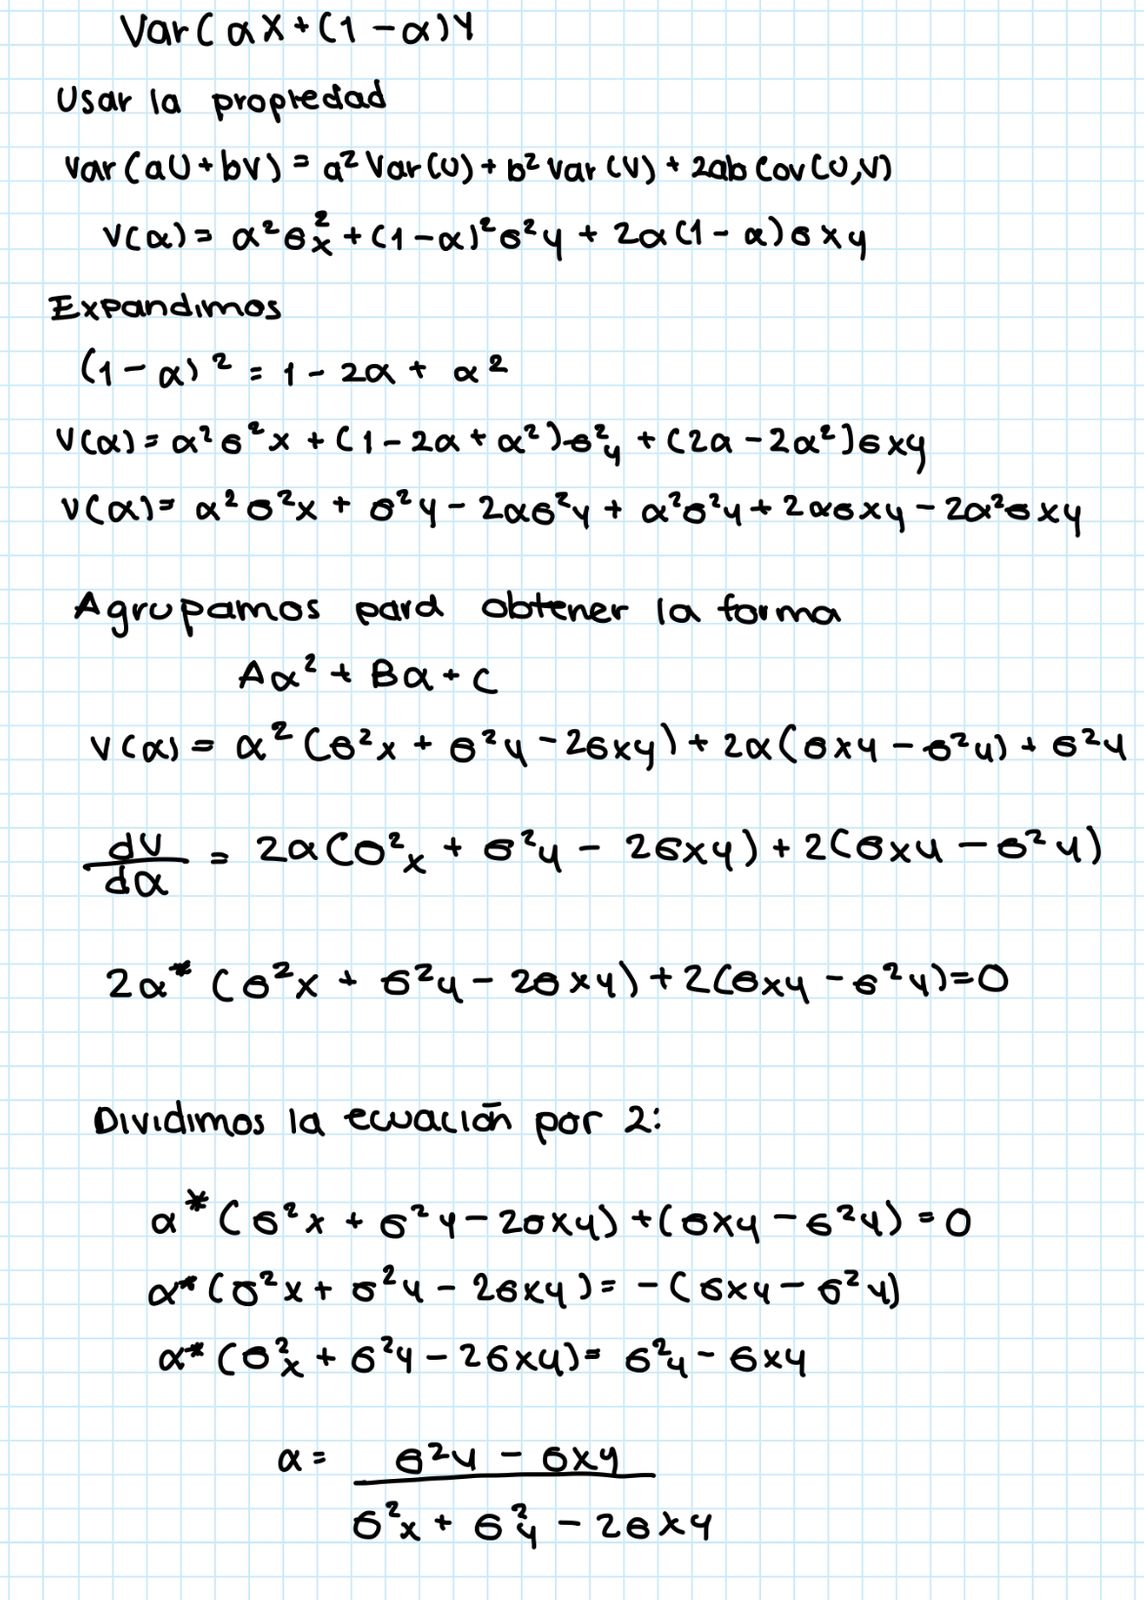

2. We will now derive the probability that a given observation is part
of a bootstrap sample. Suppose that we obtain a bootstrap sample
from a set of n observations.

(a) What is the probability that the first bootstrap observation is
not the jth observation from the original sample? Justify your
answer.

La probabilidad de que una observación especifica no sea seleccionada en la primera extracción de bootstrap es:

P(No j en la 1 extracción) = 1 - P(Si j en la 1 extracción)

P(Si j en la 1 extracción) = 1 - 1/n



(b) What is the probability that the second bootstrap observation
is not the jth observation from the original sample?

Ya que el muestreo es con reemplazdo, las extracciones son independientes.

La probabilidad de que la observación no sea seleccionada en la segunda extracción es la misma que en la primera: P(Si j en la 2 extracción) = 1 - 1/n.


(c) Argue that the probability that the jth observation is not in the
bootstrap sample is (1 - 1/n)n.

Una muestra bootstrap tiene n extracciones independientes. Para que j no esté en la muestra bootstrap, debe no haber sido seleccionada en ninguna de las n extracciones.Multiplicamos las probabilidades de los n eventos independientes:

P(No j en Bootstrap) = P(No j en 1) x P(No j en 2) x ... x P(No j en n) =
P (No j en Bootstrap) = (1 - 1/n) ^ n.


(d) When n = 5, what is the probability that the jth observation is in the bootstrap sample?

La probabilidad de que j esté en la muestra bootstrap es el complemento de la probabilidad de que no esté en la muestra.

P(Sí j en Bootstrap) = 1 - P(No j en Bootstrap) = 1- (1 - 1/n)^ n.

Cuando n = 5

P(Sí) = 1 - (1 - 1/5)^5 = 1 - (0.8)^5
P(Sí) = 0.67232


(e) When n = 100, what is the probability that the jth observation
is in the bootstrap sample?

n = 100
P(Sí) = 1 - (1 - 1/100)^100 = 1 - (0.99)^100
P(Sí) = 0.63397


(f) When n = 10, 000, what is the probability that the jth observation is in the bootstrap sample?

n = 10000
P(Sí) = 1 - (1 - 1/10000)^10000 =
P(Sí) = 0.63214


(g) Create a plot that displays, for each integer value of n from 1
to 100, 000, the probability that the jth observation is in the
bootstrap sample. Comment on what you observe.




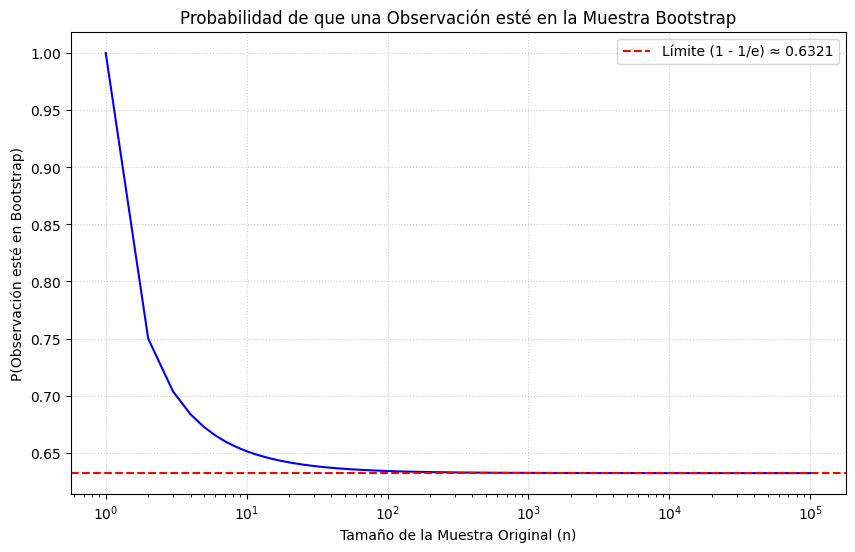

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_values = np.arange(1, 100001)

prob_in_bootstrap = 1 - (1 - 1/n_values)**n_values

plt.figure(figsize=(10, 6))
plt.plot(n_values, prob_in_bootstrap, color='blue')
plt.axhline(1 - np.exp(-1), color='red', linestyle='--', label=f'Límite (1 - 1/e) ≈ {1 - np.exp(-1):.4f}')
plt.title('Probabilidad de que una Observación esté en la Muestra Bootstrap')
plt.xlabel('Tamaño de la Muestra Original (n)')
plt.ylabel('P(Observación esté en Bootstrap)')
plt.xscale('log')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

Para valores pequeños como n=5 la probabilidad es relativamente alta alrededor 0.67. Conforme n aumenta, la probabilidad disminuye rápidamente y luego converge a 0.6321.

(h) We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here
j = 4. We first create an array store with values that will subsequently be overwritten using the function np.empty(). We then repeatedly create bootstrap samples, and each time we record
whether or not the fifth observation is contained in the bootstrap
sample.

In [ ]:
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    sample = rng.choice(100, 100, replace=True)

    store[i] = np.sum(sample == 4) > 0

np.mean(store)

np.float64(0.6362)

Con esto confirmamos empíricamente la validez del cálculo teórico anterior.

3. We now review k-fold cross-validation.

(a) Explain how k-fold cross-validation is implemented.

La validación cruzada se implementa dividiendo en conjunto de datos en K partes de igual tamaño. El modelo se ajusta K veces; en cada repetición, y un k se reserva para el conjunto de validación para evaluar el rendimiento y los k restantes se usan para el entrenamiento. Y el error de prueba estimado del modelo es el promedio de los K errores de validación calculados en cada iteración.

(b) What are the advantages and disadvantages of k-fold crossvalidation relative to:

i. The validation set approach?

K-folds tiene una variabilidad mucho menor en la estimación del error, ya que promedia k resultados en lugar de depender de una única división aleatoria y ofrece un menor sesgo debido a que los conjuntos de entrenamiento son más grandes.

ii. LOOCV?

K-folds tiene una varianza más baja que LOOCV, ya que los K errores de predicción están menos correlacionados. Además del costo computacional.


4. Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X.
Carefully describe how we might estimate the standard deviation of
our prediction.

Para estimar la desviación estándar de una predicción, se debe utilizar el método Bootsrap. El proceso implica generar B muestras de Bootstrap mediante un muestreo con reemplazo a partir del conjunto de datos original, el modelo se ajusta en cada una de las B muestras y se utiliza para hacer una predicción, y la desviación estándar de estas B predicciones se toma como el Error Estándar de la predicción.

#Applied

5.


In [ ]:
#!pip install ISLP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

a)

In [ ]:
Datos_Deuda = pd.read_csv("Default.csv")
# Codificación de la respuesta: 'Yes' (Default) a 1, 'No' a 0
y = Datos_Deuda['default'].apply(lambda x: 1 if x == 'Yes' else 0)
X = Datos_Deuda[['income', 'balance']]
X = sm.add_constant(X).astype(float)

In [ ]:
Modelo_Completo = sm.Logit(y, X).fit()
print(Modelo_Completo.params)

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
const     -11.540468
income      0.000021
balance     0.005647
dtype: float64


b)

In [ ]:
np.random.seed(1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=1)
Modelo_Split = sm.Logit(y_train, X_train).fit(disp=False)
y_val_prob = Modelo_Split.predict(X_val)
y_val_pred = (y_val_prob > 0.5).astype(int)
Error_Validacion_1 = np.mean(y_val_pred != y_val)
print(Error_Validacion_1)

0.025


c)

In [ ]:
np.random.seed(2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=2)
Modelo_Split = sm.Logit(y_train, X_train).fit(disp=False)
y_val_prob = Modelo_Split.predict(X_val)
y_val_pred = (y_val_prob > 0.5).astype(int)
Error_Validacion_2 = np.mean(y_val_pred != y_val)
print(Error_Validacion_2)

np.random.seed(3)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=3)
Modelo_Split = sm.Logit(y_train, X_train).fit(disp=False)
y_val_prob = Modelo_Split.predict(X_val)
y_val_pred = (y_val_prob > 0.5).astype(int)
Error_Validacion_3 = np.mean(y_val_pred != y_val)
print(Error_Validacion_3)

np.random.seed(4)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=4)
Modelo_Split = sm.Logit(y_train, X_train).fit(disp=False)
y_val_prob = Modelo_Split.predict(X_val)
y_val_pred = (y_val_prob > 0.5).astype(int)
Error_Validacion_4 = np.mean(y_val_pred != y_val)
print(Error_Validacion_4)

0.0248
0.0248
0.0238


Los errores de prueba estimados varían ligeramente dependiendo de la división aleatoria de los datos.

d)

In [ ]:
X_Extendido = Datos_Deuda[['income', 'balance', 'student']]
X_Extendido = pd.get_dummies(X_Extendido, columns=['student'], drop_first=True)
X_Extendido = sm.add_constant(X_Extendido).astype(float)

np.random.seed(1)
X_train_ext, X_val_ext, y_train_ext, y_val_ext = train_test_split(
    X_Extendido, y, test_size=0.5, random_state=1)
Modelo_Extendido = sm.Logit(y_train_ext, X_train_ext).fit()
y_val_pred_ext = (Modelo_Extendido.predict(X_val_ext) > 0.5).astype(int)
Error_Validacion_Ext = np.mean(y_val_pred_ext != y_val_ext)
print(Error_Validacion_Ext)

Optimization terminated successfully.
         Current function value: 0.077791
         Iterations 10
0.0262


La inclusión de la variable student no conduce a una reducción en la tasa de error de prueba. De hecho aumenta, esto nos dice que aunque el estatus de estudiante puede ser relevante para la inferencia estadística, no mejora el rendimeinto del modelo.

6.
a)

In [ ]:
np.random.seed(1)
GLM_Final = sm.GLM(y, X, family=sm.families.Binomial()).fit()
SE_Analitico = GLM_Final.bse[['income', 'balance']]
print(SE_Analitico)

income     0.000005
balance    0.000227
dtype: float64


b)

In [ ]:
def funcion_bootstrap(data_df, indices_idx):
    Sub_Muestra = data_df.iloc[indices_idx]
    X_boot = Sub_Muestra[['income', 'balance']]
    X_boot = sm.add_constant(X_boot).astype(float)
    y_boot = Sub_Muestra['default'].apply(lambda x: 1 if x == 'Yes' else 0)
    Modelo_boot = sm.GLM(y_boot, X_boot, family=sm.families.Binomial()).fit(disp=False)
    return Modelo_boot.params[['income', 'balance']].values

c)

In [ ]:
B_REPLICAS = 1000
N_OBS = Datos_Deuda.shape[0]
Coefs_Bootstrap = np.zeros((B_REPLICAS, 2))
Generador_Rand = np.random.default_rng(1)

for b in range(B_REPLICAS):
    Indices_Muestra = Generador_Rand.integers(0, N_OBS, N_OBS)
    Coefs_Bootstrap[b, :] = funcion_bootstrap(Datos_Deuda, Indices_Muestra)

SE_Bootstrap = Coefs_Bootstrap.std(axis=0, ddof=1)
print(pd.Series(SE_Bootstrap, index=['income', 'balance']))

income     0.000005
balance    0.000226
dtype: float64


d)

In [ ]:
print("SE Analíticos:", SE_Analitico.values)
print("SE Bootstrap:", SE_Bootstrap)

SE Analíticos: [4.98524546e-06 2.27381384e-04]
SE Bootstrap: [4.87360287e-06 2.25912756e-04]


Los errores estándar estimados de la forma analítica y el método Bootstrap son muy similares, esto nos sugiere que las suposiciones fueron adecuadas.

7.

In [ ]:
Datos_Semanal = load_data("Weekly")
Datos_Semanal['Direction_binaria'] = Datos_Semanal['Direction'].apply(lambda x: 1 if x == 'Up' else 0)
Xw = Datos_Semanal[['Lag1', 'Lag2']]
Xw = sm.add_constant(Xw).astype(float)
yw = Datos_Semanal['Direction_binaria']

a)

In [ ]:
Modelo_Completo_W = sm.Logit(yw, Xw).fit()
print("Coefficients:")
print(Modelo_Completo_W.params)

Optimization terminated successfully.
         Current function value: 0.683297
         Iterations 4
Coefficients:
const    0.221224
Lag1    -0.038722
Lag2     0.060248
dtype: float64


b)

In [ ]:
Xw_sin1 = Xw.drop(index=0)
yw_sin1 = yw.drop(index=0)
Modelo_sin1 = sm.Logit(yw_sin1, Xw_sin1).fit()
print("Coefficients:")
print(Modelo_sin1.params)

Optimization terminated successfully.
         Current function value: 0.683147
         Iterations 4
Coefficients:
const    0.223243
Lag1    -0.038433
Lag2     0.060848
dtype: float64


c)

In [ ]:
X_prueba1 = Xw.iloc[0:1]
y_real1 = yw.iloc[0]
Prob_Pred_1 = Modelo_sin1.predict(X_prueba1).iloc[0]
Clase_Pred_1 = int(Prob_Pred_1 > 0.5)
print("Probabilidad Posterior (Up):", Prob_Pred_1)
print("Predicted class:", Clase_Pred_1, "Actual class:", int(y_real1))
print("Correctly classified?", Clase_Pred_1 == int(y_real1))

Probabilidad Posterior (Up): 0.5713923205204433
Predicted class: 1 Actual class: 0
Correctly classified? False


No, fue clasificada incorrectamente.

d)

In [ ]:
N_Semana = Xw.shape[0]
Errores_LOOCV = np.zeros(N_Semana, dtype=int)
for i in range(N_Semana):
    X_train_i = Xw.drop(index=i)
    y_train_i = yw.drop(index=i)
    X_test_i = Xw.iloc[i:i+1]
    y_test_i = yw.iloc[i]
    Modelo_i = sm.GLM(y_train_i, X_train_i, family=sm.families.Binomial()).fit(disp=False)
    P_i = Modelo_i.predict(X_test_i).iloc[0]
    Pred_i = int(P_i > 0.5)
    Errores_LOOCV[i] = int(Pred_i != int(y_test_i))

e)

In [ ]:
Error_Final_LOOCV = Errores_LOOCV.mean()
print("LOOCV classification error:", Error_Final_LOOCV)

LOOCV classification error: 0.44995408631772266


La tasa de clasificación es aprox de 45%, por lo que de correcta clasificación es de 55% se desempeña apenas mejor que el azar, esto indica que la relación lienal entre el rendimiento de la semana anterior y la dirección del mercado es muy débil.

8.
a)

In [ ]:
Generador_Rand = np.random.default_rng(1)
x = Generador_Rand.normal(size=100)
y_sim = x - 2 * x**2 + Generador_Rand.normal(size=100)
print("n =", len(y_sim), "p = 1")
print("Model: y = x - 2x² + ε")

n = 100 p = 1
Model: y = x - 2x² + ε


b)

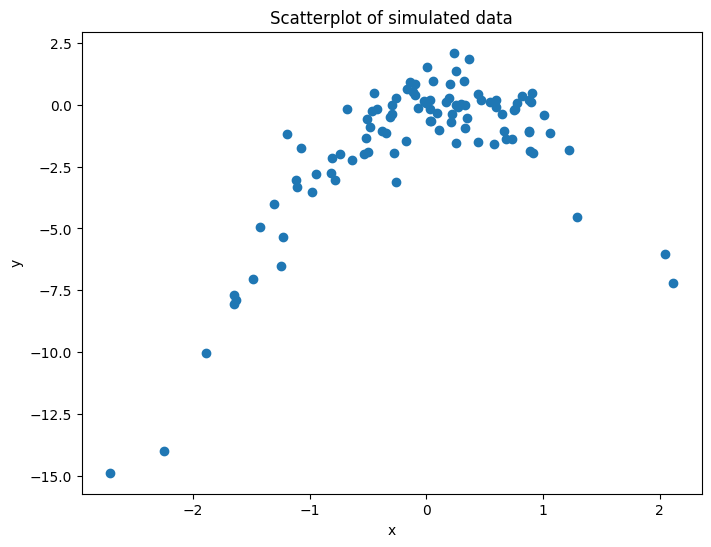

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y_sim)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot of simulated data")
plt.show()

Con la misma forma podemos ver que es una función cuadrática.

c)

In [ ]:
def LOOCV_Polinomio(x_array, y_array, grado):
    N_local = len(y_array)
    MSE_locales = np.zeros(N_local)
    for i in range(N_local):
        x_train = np.delete(x_array, i)
        y_train = np.delete(y_array, i)
        X_poly_train = np.vander(x_train, N=grado+1, increasing=True)
        Modelo = sm.OLS(y_train, X_poly_train).fit()
        X_poly_test = np.vander([x_array[i]], N=grado+1, increasing=True)
        y_pred = Modelo.predict(X_poly_test)
        MSE_locales[i] = (y_array[i] - y_pred[0])**2
    return MSE_locales.mean()

In [ ]:
np.random.seed(1)
Errores_LOOCV_1 = [LOOCV_Polinomio(x, y_sim, d) for d in range(1, 5)]
print("LOOCV MSEs (seed 1):", Errores_LOOCV_1)

LOOCV MSEs (seed 1): [np.float64(6.633029839181983), np.float64(1.1229368563419686), np.float64(1.3017965489358874), np.float64(1.3323942694179305)]


d)

In [ ]:
np.random.seed(2)
Errores_LOOCV_2 = [LOOCV_Polinomio(x, y_sim, d) for d in range(1, 5)]
print("LOOCV MSEs (seed 2):", Errores_LOOCV_2)

LOOCV MSEs (seed 2): [np.float64(6.633029839181983), np.float64(1.1229368563419686), np.float64(1.3017965489358874), np.float64(1.3323942694179305)]


Los resultados son iguales para ambas semillas. Esto pasa ya que LOOCV no tiene un componente aleatorio, en cada repetición se deja una observación fuera.

e)

In [ ]:
Grado_Minimo = int(np.argmin(Errores_LOOCV_1) + 1)
print("Degree with smallest LOOCV MSE:", Grado_Minimo)

Degree with smallest LOOCV MSE: 2


Se esperaba que este fuera el mejor modelo, la simulación de los datos se realizo con una formula Y = X - 2X^2.

f)

In [ ]:
for d in range(1, 5):
    X_Grado = np.vander(x, N=d+1, increasing=True)
    Modelo_Grado = sm.OLS(y_sim, X_Grado).fit()
    print(f"8(f) Degree {d} model coefficients and p-values:")
    Parametros = pd.concat([
        pd.Series(Modelo_Grado.params, name="coef"),
        pd.Series(Modelo_Grado.pvalues, name="pval")
    ], axis=1).round(4)
    print(Parametros)
    print()

8(f) Degree 1 model coefficients and p-values:
     coef  pval
0 -1.4650   0.0
1  1.9494   0.0

8(f) Degree 2 model coefficients and p-values:
     coef    pval
0 -0.0728  0.5428
1  0.9663  0.0000
2 -2.0047  0.0000

8(f) Degree 3 model coefficients and p-values:
     coef    pval
0 -0.0572  0.6345
1  1.1146  0.0000
2 -2.0471  0.0000
3 -0.0643  0.2872

8(f) Degree 4 model coefficients and p-values:
     coef    pval
0  0.1008  0.4596
1  0.9050  0.0000
2 -2.5059  0.0000
3  0.0338  0.6425
4  0.1042  0.0231



En el modelo 3 y 4 podemos ver que los últimos coheficientes no tienen valor estadístico, que ya estan sobrando.

9.

In [ ]:
Datos_Boston = load_data("Boston")
Mediana_Valor = Datos_Boston['medv']

a)

In [ ]:
Media_Muestra = Mediana_Valor.mean()
print("mi_hat =", Media_Muestra)

mi_hat = 22.532806324110677


b)

In [ ]:
SE_Analitico_Media = Mediana_Valor.std(ddof=1) / np.sqrt(len(Mediana_Valor))
print("standard error of mi_hat =", SE_Analitico_Media)

standard error of mi_hat = 0.4088611474975351


c)

In [ ]:
B_replicas = 1000
Generador_Rand = np.random.default_rng(1)
Medias_Boot = np.array([
    Mediana_Valor.sample(frac=1, replace=True, random_state=int(Generador_Rand.integers(0, 1e9))).mean()
    for _ in range(B_replicas)
])
SE_Bootstrap_Media = Medias_Boot.std(ddof=1)
print("bootstrap SE of mi_hat =", SE_Bootstrap_Media)

bootstrap SE of mi_hat = 0.40734230823165357


d)

In [ ]:
mi_hat = Media_Muestra
ci_95_boot = [mi_hat - 2 * SE_Bootstrap_Media, mi_hat + 2 * SE_Bootstrap_Media]
ci_95_two_se = [mi_hat - 2 * SE_Analitico_Media, mi_hat + 2 * SE_Analitico_Media]
print("95% CI (bootstrap):", ci_95_boot)
print("95% CI (two SE rule):", ci_95_two_se)

95% CI (bootstrap): [np.float64(21.71812170764737), np.float64(23.347490940573984)]
95% CI (two SE rule): [np.float64(21.715084029115605), np.float64(23.35052861910575)]


e)

In [ ]:
Mediana_Muestra = Mediana_Valor.median()
print("Sample median =", Mediana_Muestra)

Sample median = 21.2


f)

In [ ]:
Medianas_Boot = np.array([
    Mediana_Valor.sample(frac=1, replace=True, random_state=int(Generador_Rand.integers(0, 1e9))).median()
    for _ in range(B_replicas)
])
SE_Bootstrap_Mediana = Medianas_Boot.std(ddof=1)
print("Bootstrap SE of median =", SE_Bootstrap_Mediana)
print()

Bootstrap SE of median = 0.37068186500696904



g)

In [ ]:
P10_Muestra = np.percentile(Mediana_Valor, 10)
print("10th percentile =", P10_Muestra)

10th percentile = 12.75


h)

In [ ]:
P10_Boot = np.array([
    np.percentile(Mediana_Valor.sample(frac=1, replace=True, random_state=int(Generador_Rand.integers(0, 1e9))), 10)
    for _ in range(B_replicas)
])
SE_Bootstrap_P10 = P10_Boot.std(ddof=1)
print("Bootstrap SE of 10th percentile =", SE_Bootstrap_P10)

Bootstrap SE of 10th percentile = 0.5111307583702551


El bootstrap fue fundamental para estimar la variabilidad de estadísticos completos para los cuales no hay fórmulas analíticas. Además, el SE de la media por ambos metodos es casi igual.